# Topic Modelling: _Documenting the American South_ 1808-1865

This JupyterNotebook was devised by DARIAH and can be retrieved from https://github.com/DARIAH-DE/Topics.

In [26]:
from pathlib import Path
import dariah
import cophi
from cophi_toolbox import preprocessing
import os
import metadata_toolbox.utils as metadata
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

## Preprocessing the corpus

Setting the path:

In [27]:
directory = Path("data", "1808-1865-chunks")

Displaying the files in the folder:

In [28]:
sorted(os.listdir(path=directory))

['fpn-ball-ball_0000.txt',
 'fpn-ball-ball_0001.txt',
 'fpn-ball-ball_0002.txt',
 'fpn-ball-ball_0003.txt',
 'fpn-ball-ball_0004.txt',
 'fpn-ball-ball_0005.txt',
 'fpn-ball-ball_0006.txt',
 'fpn-ball-ball_0007.txt',
 'fpn-ball-ball_0008.txt',
 'fpn-ball-ball_0009.txt',
 'fpn-ball-ball_0010.txt',
 'fpn-brownw-brown_0000.txt',
 'fpn-brownw-brown_0001.txt',
 'fpn-brownw-brown_0002.txt',
 'fpn-brownw-brown_0003.txt',
 'fpn-grandy-grandy_0000.txt',
 'fpn-grandy-grandy_0001.txt',
 'fpn-hortonlife-horton_0000.txt',
 'fpn-hortonpoem-hortonpoem_0000.txt',
 'fpn-hortonpoem-hortonpoem_0001.txt',
 'fpn-jackson-jackson_0000.txt',
 'fpn-jackson-jackson_0001.txt',
 'fpn-jacobs-jacobs_0000.txt',
 'fpn-jacobs-jacobs_0001.txt',
 'fpn-jacobs-jacobs_0002.txt',
 'fpn-jacobs-jacobs_0003.txt',
 'fpn-jacobs-jacobs_0004.txt',
 'fpn-jacobs-jacobs_0005.txt',
 'fpn-jacobs-jacobs_0006.txt',
 'fpn-jacobs-jacobs_0007.txt',
 'fpn-jacobs-jacobs_0008.txt',
 'fpn-jones-jones_0000.txt',
 'fpn-jones-jones_0001.txt',
 'fpn

In [29]:
pattern = '{abbr}-{author}-{author2}_{chunk}'

Generates a table featuring the files' abbreviation, author, second mention of author, and chunk number:

In [30]:
meta = pd.concat([metadata.fname2metadata(str(path), pattern=pattern) for path in directory.glob('*.txt')])
meta[:10]

,abbr,author,author2,chunk
data\1808-1865-chunks\fpn-ball-ball_0000.txt,fpn,ball,ball,0000
data\1808-1865-chunks\fpn-ball-ball_0001.txt,fpn,ball,ball,0001
data\1808-1865-chunks\fpn-ball-ball_0002.txt,fpn,ball,ball,0002
data\1808-1865-chunks\fpn-ball-ball_0003.txt,fpn,ball,ball,0003
data\1808-1865-chunks\fpn-ball-ball_0004.txt,fpn,ball,ball,0004
data\1808-1865-chunks\fpn-ball-ball_0005.txt,fpn,ball,ball,0005
data\1808-1865-chunks\fpn-ball-ball_0006.txt,fpn,ball,ball,0006
data\1808-1865-chunks\fpn-ball-ball_0007.txt,fpn,ball,ball,0007
data\1808-1865-chunks\fpn-ball-ball_0008.txt,fpn,ball,ball,0008
data\1808-1865-chunks\fpn-ball-ball_0009.txt,fpn,ball,ball,0009


Read the documents and display the text of a sample file:

In [32]:
corpus = list(preprocessing.read_files(meta.index))
corpus[1]

'we pass there be a want of live stock of every description except slave and they be deplorably abundant the field be destitute of everything that deserve the name of grass and not a spear of clover be anywhere visible the few cattle that exist be browse on the bough of the tree in the wood everything betray a scarcity of the mean of supply the slave who cultivate the vast cottonfield with a sufficiency of food we travel this day more than thirty mile and cross the catawba river in the afternoon on the bottom of which I see for the first time field of rice grow in swamp cover with water causeway be raise through the lowland in which the rice grow and on which the road be form on which we travel these ricefield or rather swamps have in my eye a beautiful appearance the rice be nearly two foot in height above the water and of a vivid green color cover a large space of at least a hundred acre have it not be for the water which appear stagnant and sickly and swarm with frog and thousand of

### Tokenising using cophi
(see https://github.com/cophi-wue/cophi-toolbox/blob/master/notebooks/introducing-cophi.ipynb):

In [33]:
corpus, metadata = cophi.corpus(directory,
                      lowercase=True,
                      token_pattern=r"\p{Letter}+\p{Connector_Punctuation}?\p{Letter}+",
                      metadata=True)

In [34]:
corpus.stats

documents        533.0
types          42839.0
tokens       4783707.0
hapax          26713.0
dtype: float64

### Removal of most frequent words, hapax legomena, and person names
List of most frequent words:

In [35]:
mfw = corpus.mfw(70)
mfw

['the',
 'and',
 'be',
 'of',
 'to',
 'in',
 'he',
 'have',
 'that',
 'his',
 'they',
 'for',
 'it',
 'with',
 'as',
 'my',
 'not',
 'on',
 'by',
 'we',
 'at',
 'this',
 'but',
 'from',
 'which',
 'she',
 'their',
 'do',
 'all',
 'you',
 'man',
 'one',
 'who',
 'or',
 'would',
 'slave',
 'say',
 'go',
 'when',
 'her',
 'so',
 'no',
 'an',
 'make',
 'there',
 'take',
 'if',
 'time',
 'see',
 'come',
 'some',
 'will',
 'could',
 'our',
 'master',
 'then',
 'mr',
 'day',
 'give',
 'out',
 'other',
 'after',
 'up',
 'upon',
 'more',
 'know',
 'any',
 'about',
 'into',
 'what']

Hapax legomena (words occuring only once in the corpus):

In [36]:
corpus.hapax[:10]

['aad',
 'aarons',
 'ab',
 'aback',
 'abaft',
 'abajo',
 'abajos',
 'abana',
 'abandonment',
 'abase']

Default stopword list:

In [37]:
path_to_stopwordlist = "data/stopwords/en.txt"
extern_stopwords = [line.strip() for line in open(path_to_stopwordlist, 'r')]
extern_stopwords[:10]

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act']

List of person names generated through NLTK's Named Entitity Recognition:

In [38]:
path_to_ner = "data/stopwords/docsouth-ner.txt"
ner = [line.strip() for line in open(path_to_ner, 'r')]
ner[:10]

['mr. boyce',
 'old frank',
 'miss bett',
 'oft',
 'nelly',
 'walter brooks',
 'beamed',
 'gone down',
 'peter coffin',
 'englishman']

Definition of most frequent words, hapax legomena, the default stopword list, and the person names:

In [39]:
features = mfw + corpus.hapax + extern_stopwords + ner

print(f"{len(features)} types will be removed from the corpus.")

58759 types will be removed from the corpus.


Displaying meta data:

In [40]:
metadata.iloc[:10]

,uuid,filepath,parent,title,suffix
0,97ff8938-40c6-11ee-8488-00090ffe0001,data\1808-1865-chunks\fpn-ball-ball_0000.txt,data\1808-1865-chunks,fpn-ball-ball_0000,.txt
1,980085f9-40c6-11ee-abc8-00090ffe0001,data\1808-1865-chunks\fpn-ball-ball_0001.txt,data\1808-1865-chunks,fpn-ball-ball_0001,.txt
2,9801d2f2-40c6-11ee-b8ac-00090ffe0001,data\1808-1865-chunks\fpn-ball-ball_0002.txt,data\1808-1865-chunks,fpn-ball-ball_0002,.txt
3,98043d67-40c6-11ee-a3bd-00090ffe0001,data\1808-1865-chunks\fpn-ball-ball_0003.txt,data\1808-1865-chunks,fpn-ball-ball_0003,.txt
4,9805c41e-40c6-11ee-874a-00090ffe0001,data\1808-1865-chunks\fpn-ball-ball_0004.txt,data\1808-1865-chunks,fpn-ball-ball_0004,.txt
5,980723f4-40c6-11ee-834b-00090ffe0001,data\1808-1865-chunks\fpn-ball-ball_0005.txt,data\1808-1865-chunks,fpn-ball-ball_0005,.txt
6,9807f107-40c6-11ee-9b69-00090ffe0001,data\1808-1865-chunks\fpn-ball-ball_0006.txt,data\1808-1865-chunks,fpn-ball-ball_0006,.txt
7,98097842-40c6-11ee-814d-00090ffe0001,data\1808-1865-chunks\fpn-ball-ball_0007.txt,data\1808-1865-chunks,fpn-ball-ball_0007,.txt
8,980afee3-40c6-11ee-9863-00090ffe0001,data\1808-1865-chunks\fpn-ball-ball_0008.txt,data\1808-1865-chunks,fpn-ball-ball_0008,.txt
9,980c8585-40c6-11ee-a76c-00090ffe0001,data\1808-1865-chunks\fpn-ball-ball_0009.txt,data\1808-1865-chunks,fpn-ball-ball_0009,.txt


The corpus is represented as a document-term matrix with absolute word frequencies from which the features you selected above are dropped:

In [41]:
dtm = corpus.drop(corpus.dtm, features).fillna(0).astype(int)
dtm.iloc[:5, :5]

,abandon,abate,abbatt,abbé,abdie
97ff8938-40c6-11ee-8488-00090ffe0001,2,0,0,0,0
980085f9-40c6-11ee-abc8-00090ffe0001,0,0,0,0,0
9801d2f2-40c6-11ee-b8ac-00090ffe0001,0,1,0,0,0
98043d67-40c6-11ee-a3bd-00090ffe0001,0,0,0,0,0
9805c41e-40c6-11ee-874a-00090ffe0001,1,0,0,0,0


In [42]:
dtm = corpus.map_metadata(data=dtm,
                          metadata=metadata,
                          uuid="uuid",
                          fields=["title"]).fillna(0).astype(int)
dtm.iloc[:5,:10]

,abandon,abate,abbatt,abbé,abdie,abdoman,abdomen,abduction,aber,abet
fpn-ball-ball_0000,2,0,0,0,0,0,0,0,0,0
fpn-ball-ball_0001,0,0,0,0,0,0,0,0,0,0
fpn-ball-ball_0002,0,1,0,0,0,0,0,0,0,0
fpn-ball-ball_0003,0,0,0,0,0,0,0,0,0,0
fpn-ball-ball_0004,1,0,0,0,0,0,0,0,0,0


## Training the model

In [43]:
# Show all rows of the topic model
pd.set_option('display.max_rows', None)

In [44]:
model = dariah.core.LDA(num_topics=80,
                        num_iterations=5000,
                        mallet="C:/mallet/bin/mallet.bat")
model

<Model: LDA, 80 topics, 5000 iterations, alpha=0.1, eta=0.01>

In [45]:
model.fit(dtm)

In [46]:
model.topics.iloc[:, :10]

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9
topic0,thee,oer,hand,eye,tear,sing,bosom,sky,chain,spring
topic1,year,appear,judge,hand,claim,petition,justice,office,authority,committee
topic2,indian,indians,chief,nation,tribe,child,visit,enemy,face,okah
topic3,british,treaty,meeting,committee,justice,issue,government,resolution,corpus,crime
topic4,louverture,general,chief,commissioner,authority,françois,arm,position,confidence,proclamation
topic5,knife,commit,wound,pistol,judge,affray,july,occur,jury,arrest
topic6,mob,shop,door,child,flame,property,gun,hand,discover,wound
topic7,meeting,proceed,indian,slaveholder,member,procure,recommendation,passport,desire,beveridge
topic8,slaveholder,year,lloyds,whip,hand,spend,thing,condition,farm,tie
topic9,thing,child,minister,year,member,nation,hand,deal,principle,preach


Topic-document distribution

In [47]:
model.topic_document.iloc[:5, :5]

1,fpn-ball-ball_0000,fpn-ball-ball_0001,fpn-ball-ball_0002,fpn-ball-ball_0003,fpn-ball-ball_0004
topic0,2.496124e-02,9.834002e-07,9.599877e-07,9.967307e-07,8.531841e-07
topic1,9.454655e-07,9.834002e-07,9.599877e-07,9.967307e-07,8.531841e-07
topic2,9.454655e-07,9.834002e-07,9.599877e-07,9.967307e-07,8.531841e-07
topic3,9.454655e-07,9.834002e-07,9.599877e-07,9.967307e-07,8.531841e-07
topic4,9.454655e-07,9.834002e-07,9.599877e-07,9.967307e-07,8.531841e-07


## Visualising the model

In [49]:
vis = dariah.core.Vis(model)
vis

<Visualization: LDA, 80 topics, 5000 iterations, alpha=0.1, eta=0.01>

In [50]:
# Information about possible visualisations:
#help(vis)

Heatmap displaying the prevalence of topics within the individual documents:

<AxesSubplot:ylabel='1'>

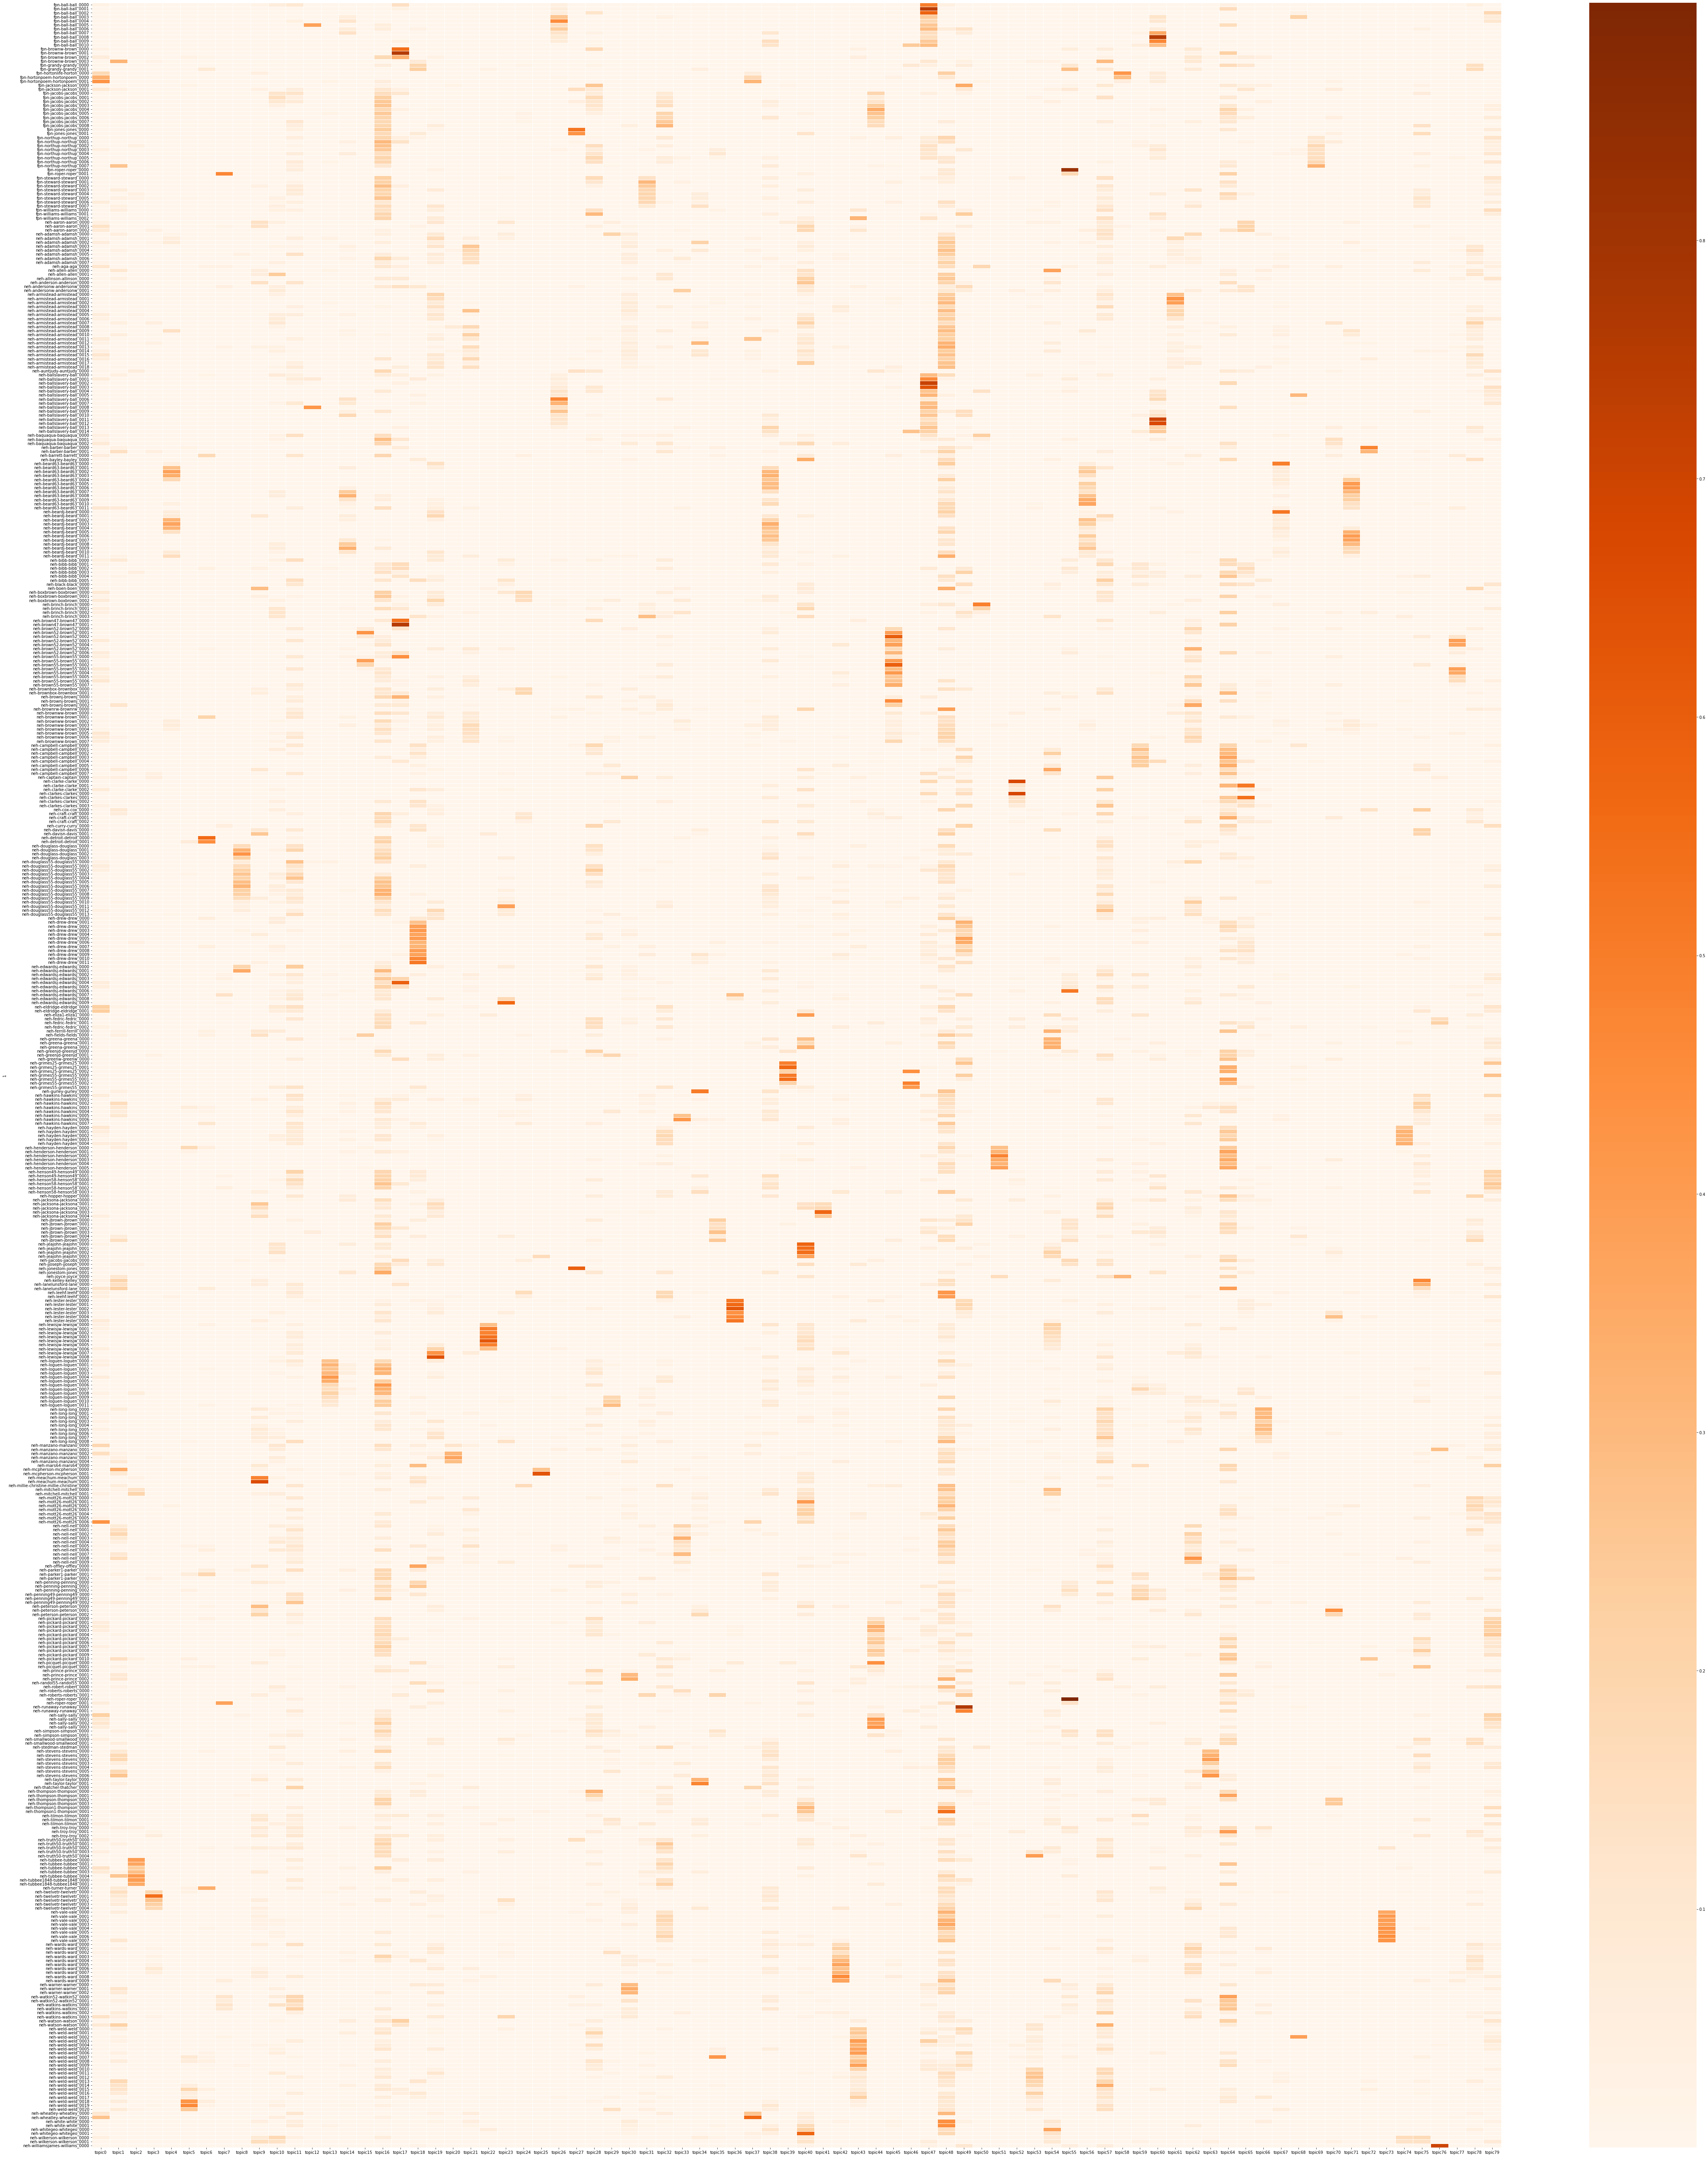

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [80, 100] 
vis.topic_document(cmap='Oranges')

Comparison of topics:

<AxesSubplot:>

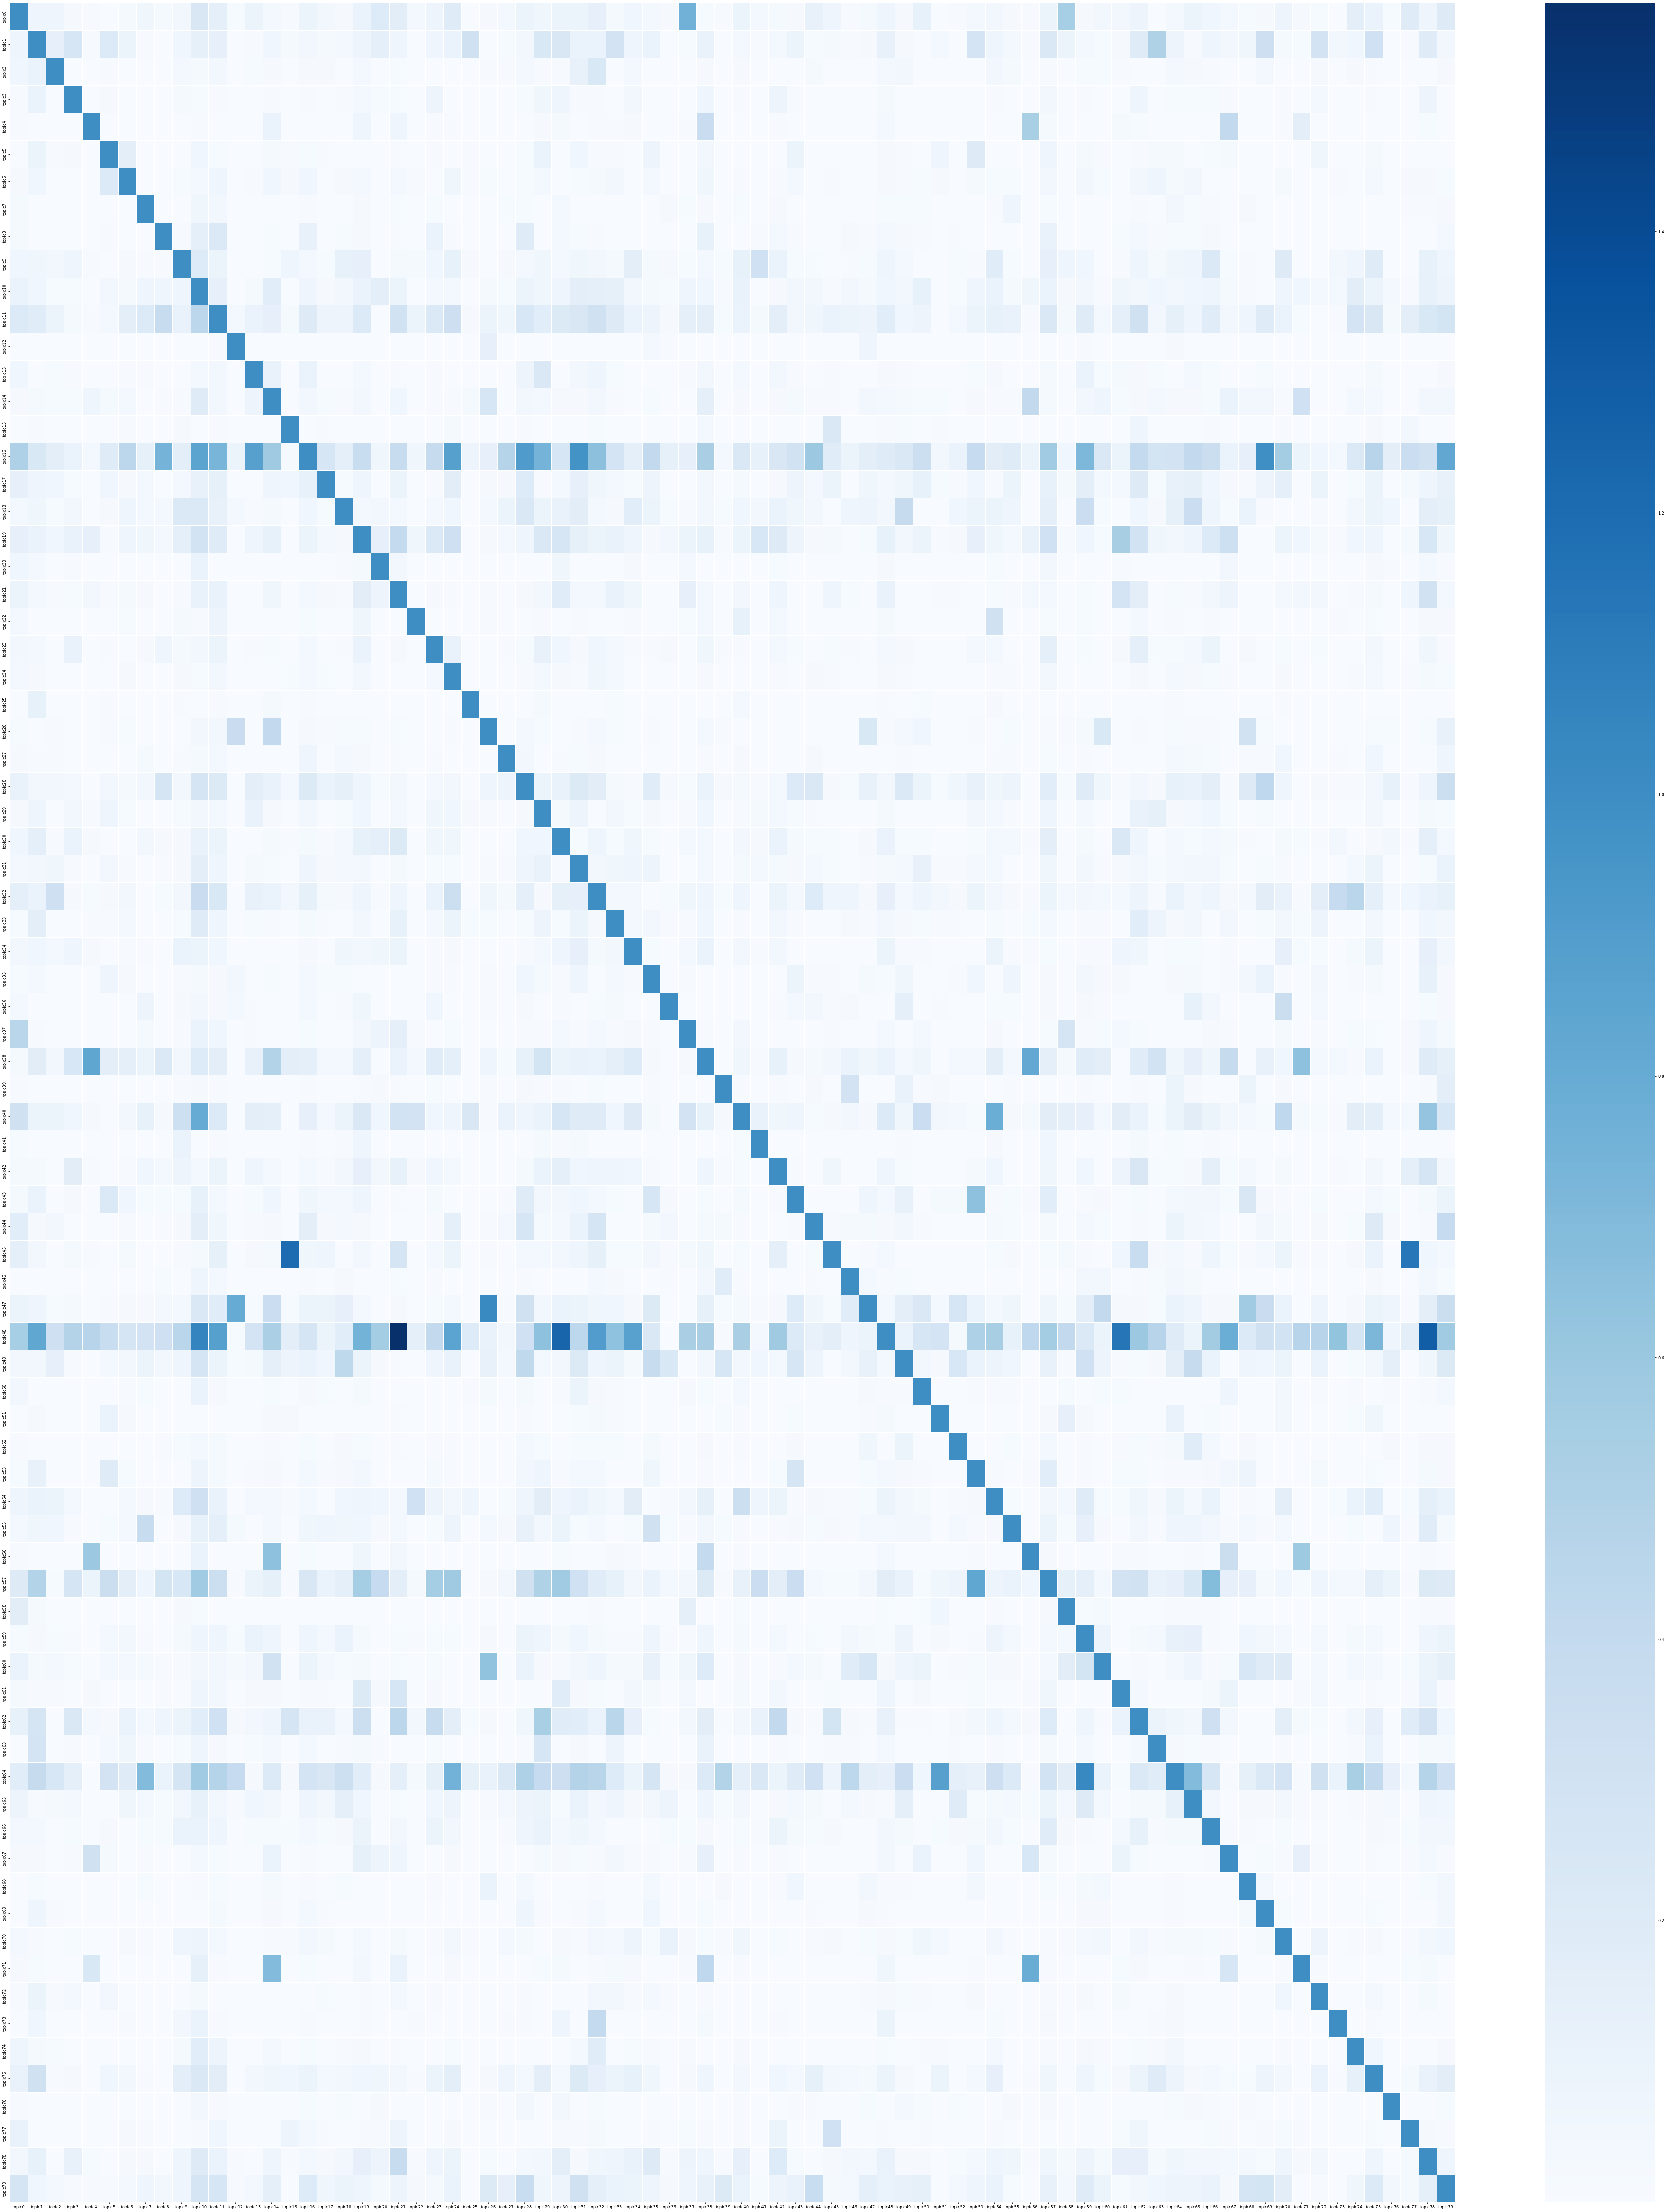

In [59]:
vis.topic_similarities(cbar=True)

Comparison of the frequency of specific words in the distinct topics:

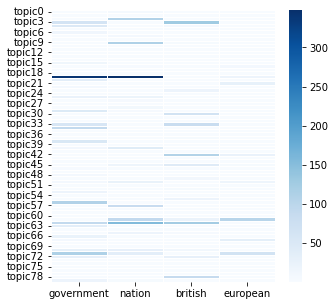

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5] 

vis.topic_word(words=["government", "nation", "british", "european"])

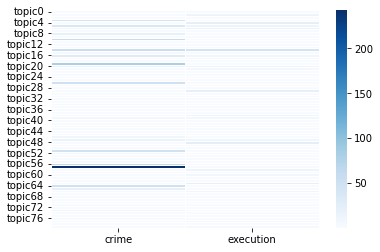

In [61]:
%matplotlib inline

vis.topic_word(words=["crime", "execution"], cbar=True)

Distribution of words within a topic:

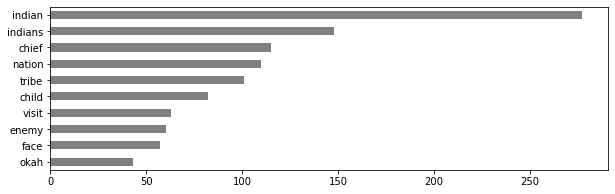

In [78]:
vis.topic("topic2")
plt.rcParams['figure.figsize'] = [10, 3]

Distribution of topics within a given document:

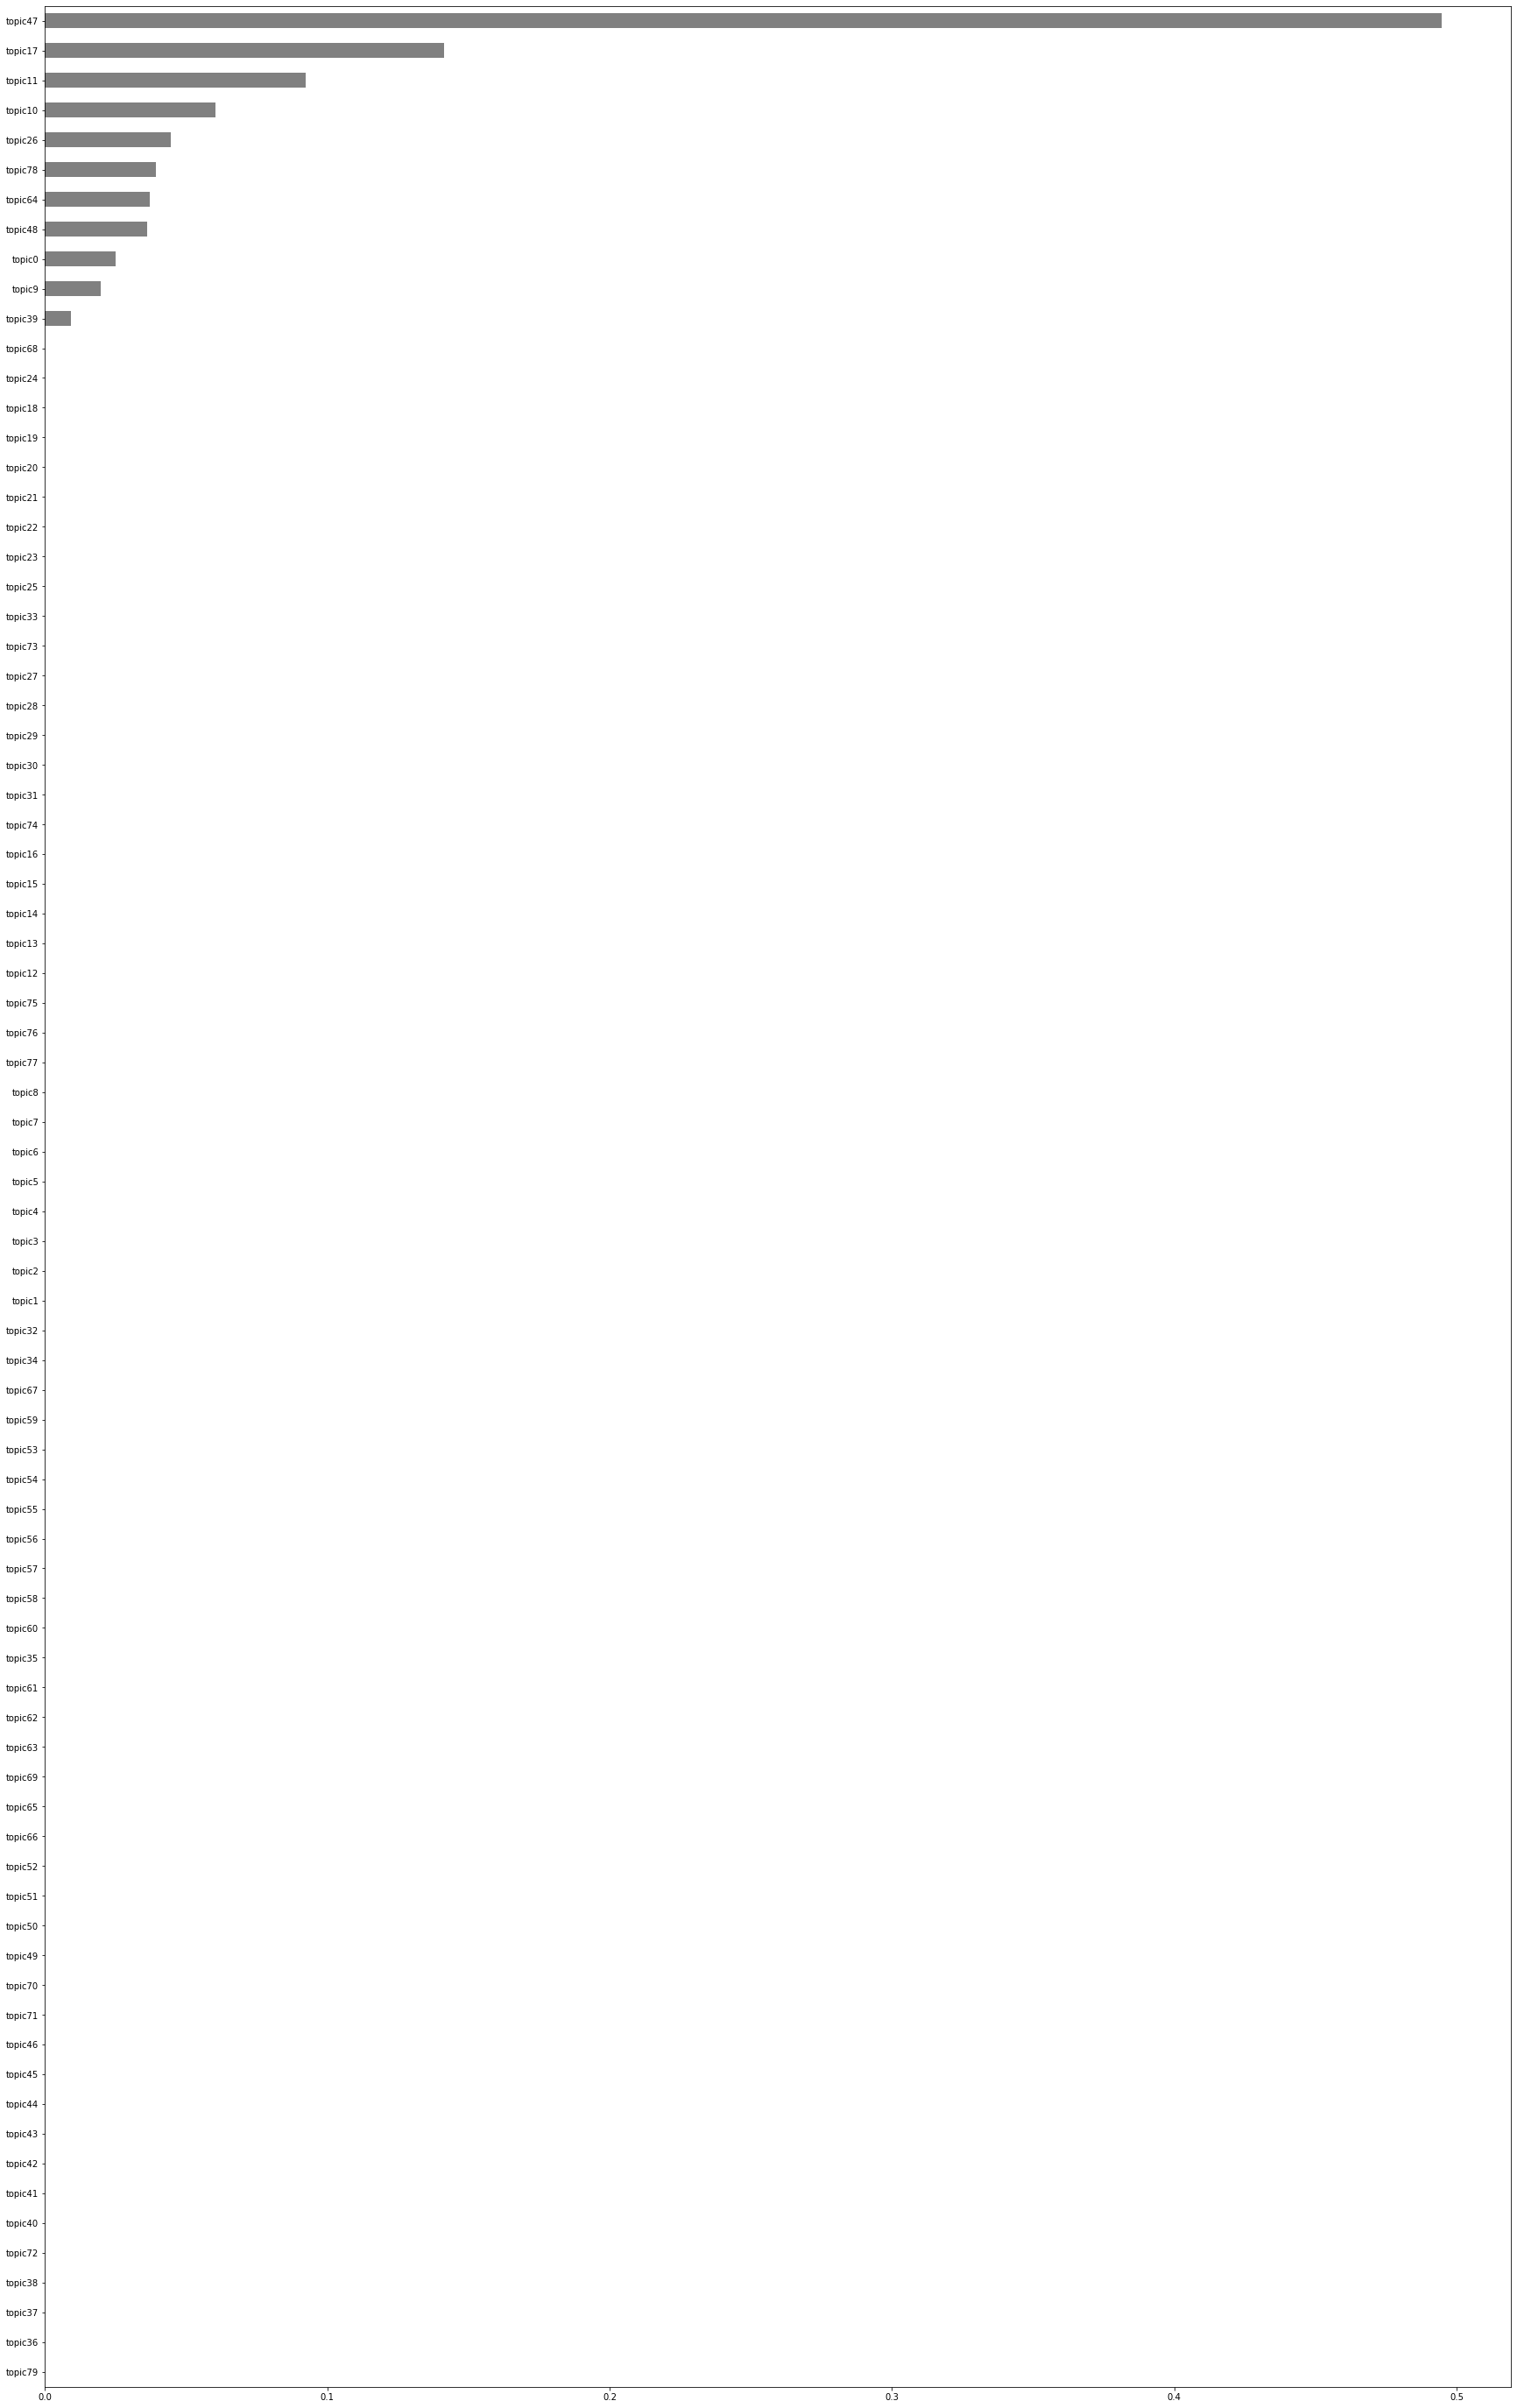

In [71]:
vis.document("fpn-ball-ball_0000")
plt.rcParams['figure.figsize'] = [50, 50]